In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [3]:
df = mb.bindome.datasets.ProBound.ctcf()
df = df.sort_values(1, ascending=False).reset_index(drop=True)

In [4]:
df

,seq,0,1
0,TATTCCATGTAGACCGGCCATTGGACTATG,0,4
1,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4
2,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4
3,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4
4,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4
...,...,...,...
120091,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0
120092,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0
120093,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0
120094,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0


In [5]:
# data = df.head(1000)
data = df.sample(n=10000)
# data = df.copy()

In [6]:
set(data[0])

{0, 1, 2}

In [7]:
n_rounds = 1

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [10]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 10000


In [11]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [14]:
import numpy as np

# rounds 1
# batches 1
# enr_series True
next w 14
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)
activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]


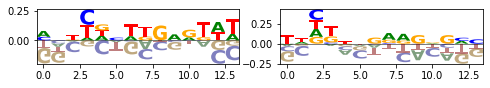

kernels mask [0, 1, 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 1
weight_decay= 0.01
dir weight 0.01
Epoch:  1, Loss: 2.0218 , best epoch: -1 secs per epoch: 0.077 s
Epoch: 11, Loss: 0.8569 , best epoch: 9 secs per epoch: 0.129 s
Epoch: 21, Loss: 0.8848 , best epoch: 17 secs per epoch: 0.128 s
Epoch: 31, Loss: 0.8680 , best epoch: 24 secs per epoch: 0.127 s
Epoch: 41, Loss: 0.8603 , best epoch: 24 secs per epoch: 0.127 s
Epoch: 51, Loss: 0.8453 , best epoch: 49 secs per epoch: 0.126 s


In [ ]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization_log = -2
# for dirichlet_regularization_log in range(-5, 3):

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1
model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=14, show_logo=True, optimize_motif_shift=False,
                                                  dirichlet_regularization=10 ** dirichlet_regularization_log,
                                                  lr=[1, 0.1, 0.1], weight_decay=[0.01, 0.01, 0.01],
                                                  num_epochs=1000, early_stopping=50, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                  max_w=15, n_kernels=3, log_each=10) #  seed=seed) # seeds.index[0]) # 
print('done....')
# res = []
# model_by_k = {}
